# Cluster and Field - Lillian Jiang


In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt          #matplotlib enables plotting routines

## INTRODUCTION

<div class="alert alert-block alert-success">

- This project reveals the B,V properties of stars in the RGC 224 cluster and the random field.  

- The dataset contains the stellar brightness measurements in counts at B and at V for both cluster and random field.

- There are four graphs in total to explain the similarities and differences between cluster and random field.

## LOAD DATA 


In [2]:
cluster = np.loadtxt('cluster.txt')
field = np.loadtxt('field.txt')

## Extract Columns

<div class="alert alert-block alert-success"> 

Each file has 3 column: 
- column 1 is a runing identification number of each star
- column 2 is the B counts
- column 3 is the V counts

 All counts have the sky background subtracted.

In [3]:
cluster_id = cluster[:,0]
cluster_b = cluster[:,1]
cluster_v = cluster[:,2]

field_id = field[:,0]
field_b = field[:,1]
field_v = field[:,2]

## GRAPHS 1 - Display the frequency of B and V counts in histograms

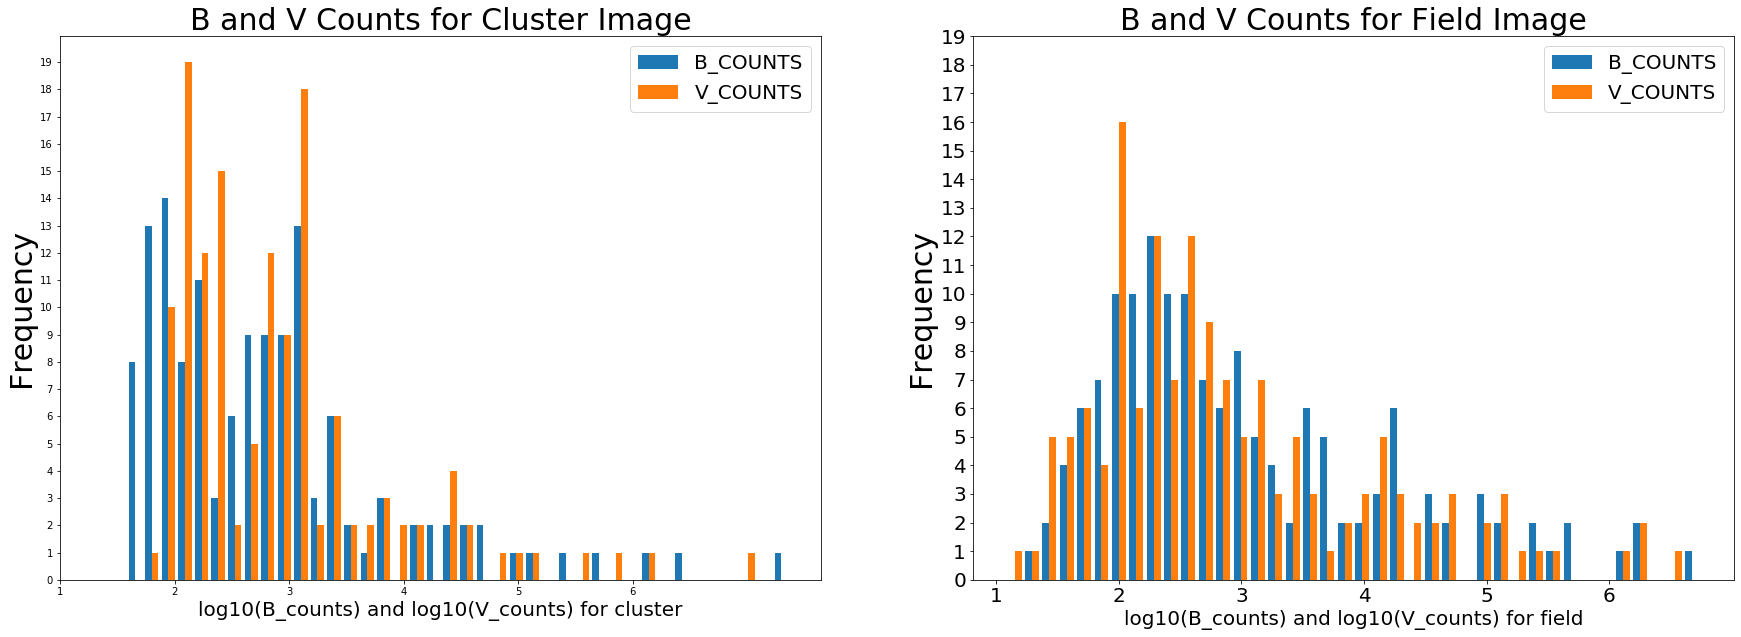

In [4]:
# Two histograms displaying B_Counts and V_Counts for both datasets
plt.figure(figsize = (30,10))

#histogram for cluster
plt.subplot(1,2,1)
cluster_bins = 40
plt.hist([np.log10(cluster_b), np.log10(cluster_v)], cluster_bins, label=['B_COUNTS','V_COUNTS'])
plt.legend(loc='upper right',prop={'size': 20})
plt.xlabel('log10(B_counts) and log10(V_counts) for cluster',size=20)
plt.ylabel('Frequency',size=30)
plt.title('B and V Counts for Cluster Image',size=30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.xticks(np.arange(1,7))
plt.yticks(np.arange(0,20))

#historgram for field
plt.subplot(1,2,2)
field_bins = 40
plt.hist([np.log10(field_b), np.log10(field_v)], field_bins, label=['B_COUNTS','V_COUNTS'])
plt.legend(loc='upper right',prop={'size': 20})
plt.xlabel('log10(B_counts) and log10(V_counts) for field',size=20)
plt.ylabel('Frequency',size=30)
plt.title('B and V Counts for Field Image',size=30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.xticks(np.arange(1,7))
plt.yticks(np.arange(0,20))

plt.show()

<div class="alert alert-block alert-success">

- The left graph is a histogram that compares the frequency of log10(b_counts) and log10(v_counts) for cluster.

- Similarily, b_counts and v_counts have a larger proportion at dimmer stars compare to brighter stars. Both of the graph show two peaks. One peak is approximately at brightness = 100; another is approximately at brightness = 1000.
The differences between them is that overall, b_counts for cluster is smaller than v_counts, which can be interpreted as under b filters, stars appear dimmer. There are also few dim stars that do not show up in v filter, but show up in b filter.

- The right one is a histogram that compares the frequency of log10(b_counts) and log10(v_counts) for field.
 Both of b_counts and v_counts for field also have two peaks, but the second peak at brightness = 10000 has much less frequency than the peak around brightness=100. 
 Overall, the stars are brighter in b_counts than v_counts.

- In short, both cluster and field have two peaks in two filters. Field has larger proportion of brighter stars than cluster.
The dimmest star in cluster is near at brightness = 10^(1/2), while the dimmest star in field is near at brightness = 10^1.1

## GRAPHS 2 - Display the frequency of B/V in histogram

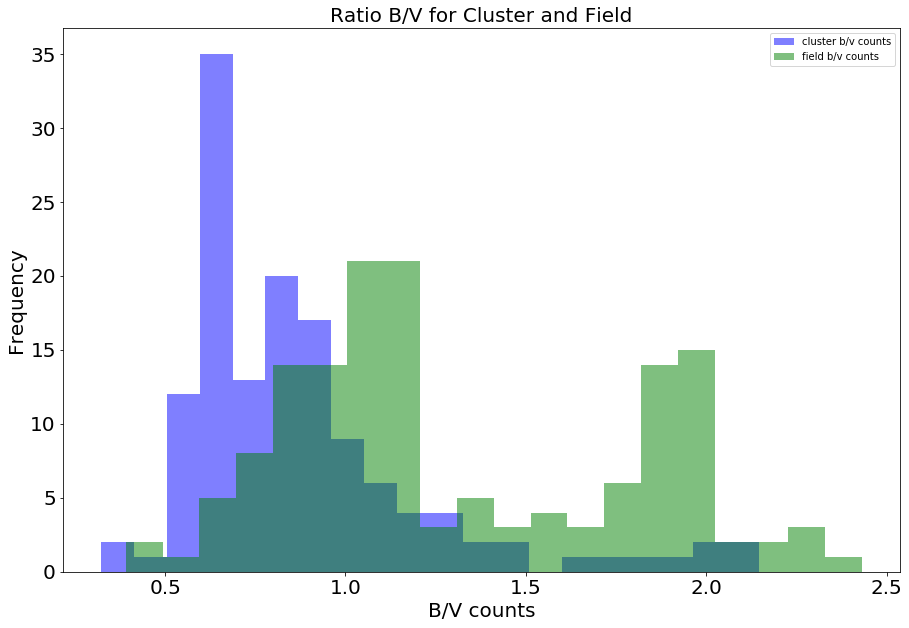

In [5]:
plt.figure(figsize=(15,10))

bins = 20
plt.hist(cluster_b/cluster_v,bins, facecolor='b', alpha=0.5, label=['cluster b/v counts'])
plt.hist(field_b/field_v,bins, facecolor='g', alpha=0.5, label=['field b/v counts'])
plt.title('Ratio B/V for Cluster and Field',size=20)
plt.xlabel('B/V counts',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.legend(loc='upper right',prop={'size': 30})

plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-success">
    
- The histogram above compares the ratio between b and v counts for field and cluster. 
- Cluster has shown one peak around ratio = 0.5 to 1, which means a large proportion of stars in cluster has the b/v ratio in that range. In other words, a large proportion of stars in cluster are dimmer in b filter than in v filter. However, the field has two distinguished peaks - one around ratio=1, another around ratio=1.9. This means in field, a proportion of stars have relatively same brightness under b and v filters, and another proportion of stars have nearly double brightness in b filter than in v filter. 
- The ratio plot shows a huge difference between cluster and field image.

## ERROR

<div class="alert alert-block alert-success">
    
In the following two scatterplots, the errors associated with the data are also calculated and displayed. Therefore, we need to calculate out the error first using error propogation.

<div class="alert alert-block alert-warning">

## RATIO ERROR For R=B/V :   $\delta$ R = abs(R) $\times$ sqrt[ ($\delta B / B)^2$ + ($\delta V / V)^2$]

<div class="alert alert-block alert-warning">

# ERROR For  R=R(X) :  $\delta$ R = sqrt[ ($\frac{d}{d_X} R \times \delta_X)^2$ ]

- We want to calculate the error of Q : Q = $1og10$B
-  based on R=R(x), $\delta$ Q = sqrt[ ($\frac{d}{d_B} Q \times \delta_B)^2$ ]
- Based on the Change of Base Formula: $log_b(X) = \frac{log_d(X)}{log_d(b)}$
- Therefore, $log_B = \frac{In_B}{In_{10}} = \frac{In_B}{1/0.43} = 0.43 B$
- $\frac{d}{d_B}(logB)$ = $0.43* \frac{d}{d_B}(In_B) = \frac{0.43}{B}$

In [6]:
#the b/v ratio for cluster and field
cluster_ratio=cluster_b/cluster_v
field_ratio=field_b/field_v

#calculate the error of b/v using the first error propogation equation above
c_b_err=np.sqrt(cluster_b)
f_b_err=np.sqrt(field_b)
c_v_err=np.sqrt(cluster_v)
f_v_err=np.sqrt(field_v)
c_ratio_err=abs(cluster_ratio)*np.sqrt((c_b_err/cluster_b)**2+((c_v_err/cluster_v)**2))
f_ratio_err=abs(field_ratio)*np.sqrt((f_b_err/field_b)**2+(f_v_err/field_v)**2)

#Calculate the error of log(b) and log(v) for cluster and field
#using the second error propogation equation above and the calculation result 
c_log10_b_err=np.sqrt((c_b_err*0.43/cluster_b)**2)
f_log10_b_err=np.sqrt((f_b_err*0.43/field_b)**2)
c_log10_v_err=np.sqrt((c_v_err*0.43/cluster_v)**2)
f_log10_v_err=np.sqrt((f_v_err*0.43/field_v)**2)

## GRAPHS 3 - Display the relationship of B and V counts in scatterplots with error

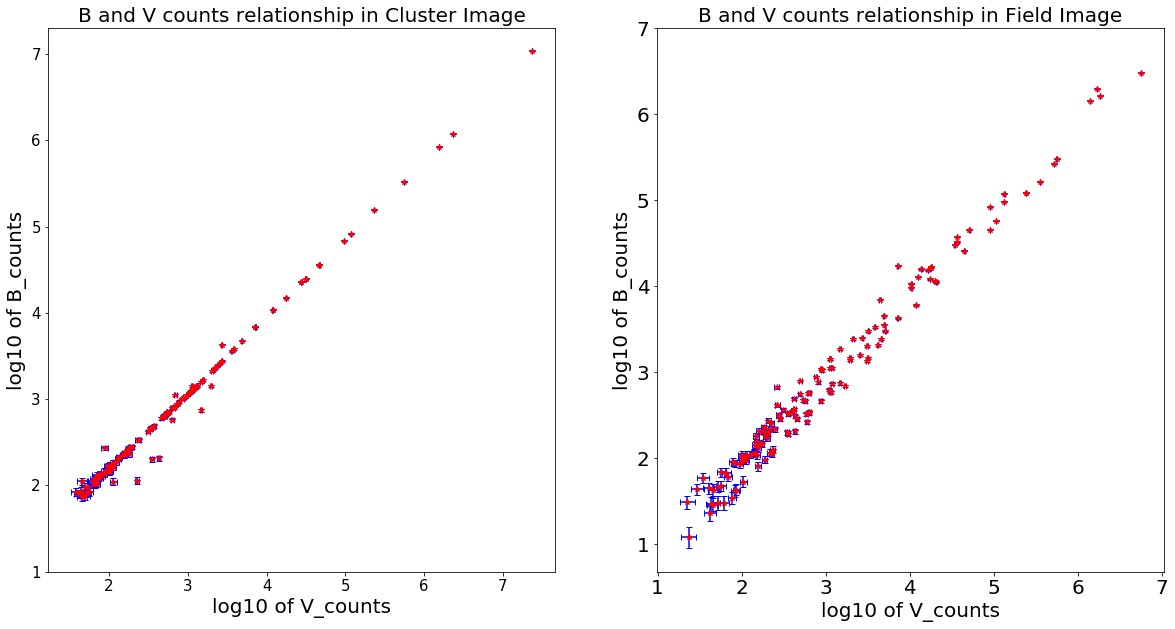

In [7]:
#scatterplot for b and v counts in cluster and field image with error 
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
#plt.plot(np.log10(cluster_b), np.log10(cluster_v),'r*',markersize=10,label=['cluster'])
plt.errorbar(np.log10(cluster_b), np.log10(cluster_v), xerr= c_log10_b_err ,yerr=c_log10_v_err,fmt="r*",ecolor='b',capsize=3)
plt.title('B and V counts relationship in Cluster Image',size=20)
plt.xlabel('log10 of V_counts',size=20)
plt.ylabel('log10 of B_counts',size=20)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.yticks(np.arange(1,8))
#plt.legend(loc='upper left',prop={'size': 20})

plt.subplot(1,2,2)
#plt.plot(np.log10(field_b), np.log10(field_v),'b*',markersize=10,label=['field'])
plt.errorbar(np.log10(field_b), np.log10(field_v), xerr= f_log10_b_err ,yerr=f_log10_v_err,fmt="r*",ecolor='b',capsize=3)
plt.title('B and V counts relationship in Field Image',size=20)
plt.xlabel('log10 of V_counts',size=20)
plt.ylabel('log10 of B_counts',size=20)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.yticks(np.arange(1,8))
#plt.legend(loc='upper left',prop={'size': 20})

plt.show()

<div class="alert alert-block alert-success">
    
- Above is two scatterplot that shows the relationship between log10(b_counts) and log10(v_counts) for cluster and field image with error, respectively. 
- In cluster data, there is a tighter relationship in brighter stars than dimmer stars. Compared between the two plot, cluster performs a linear relationship while field data are more spread out. 
- Noticeably, there is a gap in field data among brighter stars. 
- Also, the dimmer stars in field have bigger error bar compares to dimmer stars in cluster. In both field, the brighter the stars are, the smaller the errors are.

<div class="alert alert-block alert-success">
    
- The difference would caused by the propetries of stars from cluster and random field. For the cluster, the group of stars have similar propetry; therefore, they perform a tight linear relationship. For the random field, the stars captured are from various background. The relationship is more spread out.

## GRAPHS 4 - Display the relationship between B counts and Color(=B/V) in scatterplots

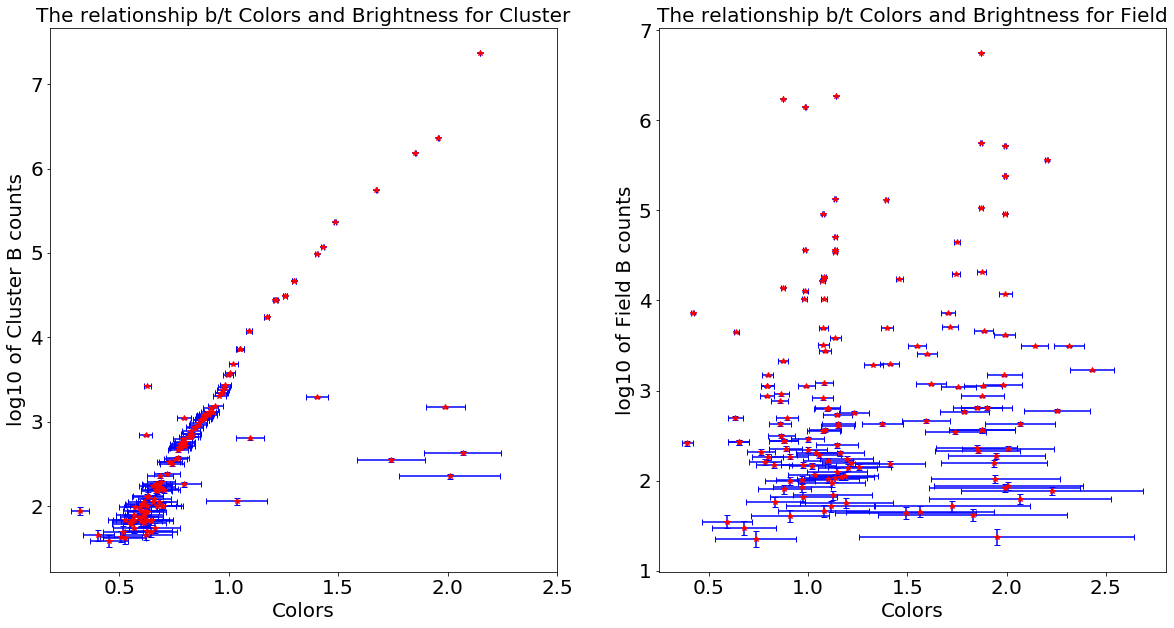

In [8]:
# calculate x,y errors in arrays
# show error bars in (x,y) plot with:
# plt.errorbar(x,y, xerr=array_x,yerr=array_y,fmt="r*",ecolor='b',capsize=3)

#the scatterplot of the relationship between Colors and Brightness for cluster and field with error 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.errorbar(cluster_ratio, np.log10(cluster_b), xerr= c_ratio_err ,yerr=c_log10_b_err,fmt="r*",ecolor='b',capsize=3)
plt.title('The relationship b/t Colors and Brightness for Cluster',size=20)
plt.xlabel('Colors',size=20)
plt.ylabel('log10 of Cluster B counts',size=20)
plt.xticks(np.arange(0.5,3,0.5))


plt.subplot(1,2,2)
plt.errorbar(field_ratio, np.log10(field_b), xerr= f_ratio_err ,yerr=f_log10_b_err,fmt="r*",ecolor='b',capsize=3)
plt.title('The relationship b/t Colors and Brightness for Field',size=20)
plt.xlabel('Colors',size=20)
plt.ylabel('log10 of Field B counts',size=20)
plt.xticks(np.arange(0.5,3,0.5))
plt.show()

<div class="alert alert-block alert-success">

- In cluster, the brighter stars tend to be bluer, and the fainter stars tend to be redder. Also, the errors in the faint stars is bigger than brighter stars.
- In field, the stars' color do not assoicate with the brightness of the stars. The error is still larger in fainter stars than in brighter stars. However, the errors of faint stars are much larger in field image than cluster image. 
- In field scatterplot, we can still detect two groups of stars at color = 1 and color = 2, which is also shown in graph 2. 
- The guess is that in cluster, stars are from the same distance. If one is brighter on CCD. it is actually brighter than others. However, in field, the brightness might be caused by near distance. 
- Another guess is that the color is assoicated with temperature of stars. The hotter stars might tend to be brighter. In cluster, the relationship is maintained. However, in field image, there is more randomness due to different distance.

## CONCLUSIONS

<div class="alert alert-block alert-success">
    
- There is some key finding form the graphs. First, the relationship between b and v counts is tighter in cluster than in field. Second, there is a linear relationship between b counts and color in cluster, while there is no linear relationship in field image. The errors assoicated with field data are larger than the error assoicated with cluster data.
    
- There is some speculation towards the findings. The random field captures stars with various distances and propeties than in cluster. In a cluster, the properties of the stars tends to be connected and related to each other, which means their relationship is tighter and usually linear. The field image contains possibility of randomness which may leads to larger spread out and errors. That is to say, the cluster and field image contain different type of stars.

- Compared with my predictions made in HW0, the findings do fit with my prediction! The cluster image shows out that there is a relationship between stars, and they are likely to from the similar background.